# Mandatory Assignment 2


## Integration af Flygtninge på Arbejdsmarkedet 
Af: Mathias Nikolaisen(dnt357), Oliver Mattthews(jvc975) & Clara Maj Folkmann(djz279)

### Problem 1

In [9]:
#1.a
import pandas as pd

df = pd.read_stata('Integration.dta')
df['const'] = 1
print(df.shape)
print(df.columns)

(4800, 7)
Index(['id', 'mand', 'ankomstaar', 'alder', 'aarslon', 'aar', 'const'], dtype='object')


In [10]:
df_dummies = pd.get_dummies(df, columns=['ankomstaar'], prefix='dummy_ankomstaar')
summary_table1 = df.groupby(['mand', 'aar']).agg(
    mean_aarslon=('aarslon', 'mean'),
    mean_alder=('alder', 'mean'),
    mean_ankomstaar=('ankomstaar', 'mean') 
).reset_index()

print(summary_table1)

   mand     aar  mean_aarslon  mean_alder  mean_ankomstaar
0   0.0  2017.0  31124.437500   28.628283      2014.981812
1   0.0  2018.0  40045.046875   29.628283      2014.981812
2   1.0  2017.0  61324.046875   28.670341      2015.017822
3   1.0  2018.0  90906.500000   29.670341      2015.017822


In [8]:
summary_table2 = df.groupby(['mand', 'aar']).agg(
    median_aarslon=('aarslon', 'median'),
    std_aarslon=('aarslon', 'std'),
    min_aarslon=('aarslon', 'min'),
    max_aarslon=('aarslon', 'max'),
    std_alder=('alder', 'std'),
    min_alder=('alder', 'min'),
    max_alder=('alder', 'max'),
).reset_index()

print(summary_table2)

   mand     aar  median_aarslon   std_aarslon   min_aarslon    max_aarslon  \
0   0.0  2017.0    28953.601562  12640.760314   9058.370117  127671.335938   
1   0.0  2018.0    34427.351562  26195.921317   4526.069824  277230.656250   
2   1.0  2017.0    55599.742188  27148.603614  10105.024414  240001.187500   
3   1.0  2018.0    77553.937500  56593.295207   7315.529297  602016.812500   

   std_alder  min_alder  max_alder  
0   6.963701       18.0       60.0  
1   6.963701       19.0       61.0  
2   7.066349       17.0       65.0  
3   7.066349       18.0       66.0  


In [15]:
#1.b
import statsmodels.api as sm
import numpy as np

df['YSM'] = df['aar'] - df['ankomstaar']
df_2017 = df[df['aar'] == 2017].copy()
y = np.log(df_2017['aarslon'])
X = df_2017[['alder', 'YSM']]
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                aarslon   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     39.84
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           9.53e-18
Time:                        10:30:45   Log-Likelihood:                -1639.8
No. Observations:                2400   AIC:                             3286.
Df Residuals:                    2397   BIC:                             3303.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4231      0.047    219.799      0.0

In [17]:
#1.c
beta_1 = model.params['alder']
beta_2 = model.params['YSM']

combined_estimate = beta_1 + beta_2

cov_matrix = model.cov_params()

se_combined = np.sqrt(
    cov_matrix.loc['alder', 'alder'] + 
    cov_matrix.loc['YSM', 'YSM'] + 
    2 * cov_matrix.loc['alder', 'YSM']
)

print(f"Combined estimate (beta_1 + beta_2): {combined_estimate}")
print(f"Standard error of the combined estimate: {se_combined}")


Combined estimate (beta_1 + beta_2): 0.09416504673465748
Standard error of the combined estimate: 0.011960398278925283


### Problem 2

In [18]:
#2.a
df_2017_2018 = df[df['aar'].isin([2017, 2018])].copy()

y = np.log(df_2017_2018['aarslon'])

X = df_2017_2018[['alder', 'YSM', 'ankomstaar']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                aarslon   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     125.4
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           3.61e-78
Time:                        10:50:19   Log-Likelihood:                -4102.0
No. Observations:                4800   AIC:                             8212.
Df Residuals:                    4796   BIC:                             8238.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -457.8689     38.818    -11.795      0.0

### Problem 3

In [7]:
#3.a
model_tp = sm.OLS(df['taxrate'], df[['logpop','const']]).fit()
df['res1'] = model_tp.resid
print(model_tp.summary())

                            OLS Regression Results                            
Dep. Variable:                taxrate   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.862
Date:                Wed, 18 Sep 2024   Prob (F-statistic):             0.0523
Time:                        11:46:54   Log-Likelihood:                -127.16
No. Observations:                  98   AIC:                             258.3
Df Residuals:                      96   BIC:                             263.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
logpop        -0.2273      0.116     -1.965      0.0

In [21]:
#3.b
df['alder_squared'] = df['alder'] ** 2
df['YSM_squared'] = df['YSM'] ** 2
df['kohorte15'] = (df['ankomstaar'] == 2015).astype(int)
df['kohorte16'] = (df['ankomstaar'] == 2016).astype(int)

df_2017_2018 = df[df['aar'].isin([2017, 2018])].copy()
df_2017_2018['ln_aarslon'] = np.log(df_2017_2018['aarslon'])
X = df_2017_2018[['alder', 'alder_squared', 'YSM', 'YSM_squared', 'kohorte15', 'kohorte16']]
X = sm.add_constant(X) 

y = df_2017_2018['ln_aarslon']

model = sm.OLS(y, X).fit()

print(model.summary())

b = model.params['YSM']
a = model.params['YSM_squared']

YSM_max = -b / (2 * a)
print(' ')
print(f"Maximum salary is reached approximately {YSM_max:.2f} years after migration.")


                            OLS Regression Results                            
Dep. Variable:             ln_aarslon   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     114.6
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          1.48e-135
Time:                        11:06:47   Log-Likelihood:                -3961.5
No. Observations:                4800   AIC:                             7937.
Df Residuals:                    4793   BIC:                             7982.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.0633      0.128     62.821

Breusch-Pagan Test Statistic: 576.213170705973
p-value: 3.1476827210595924e-121


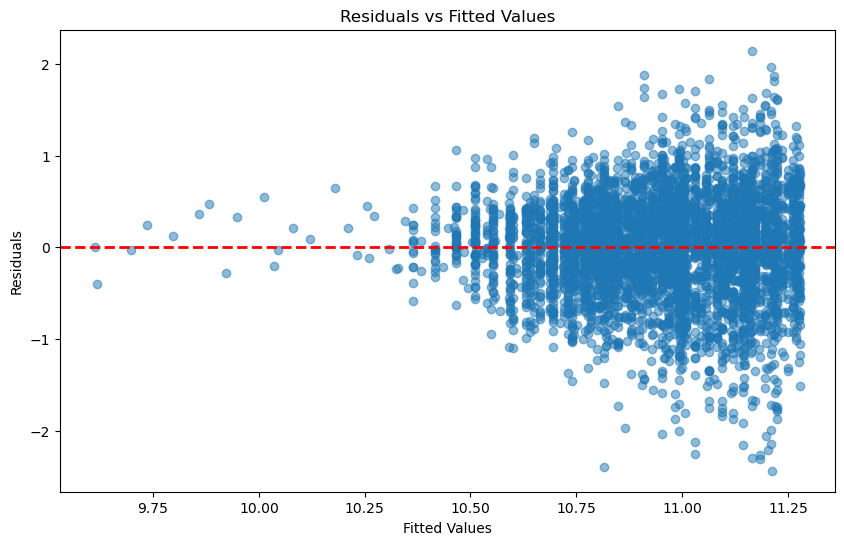

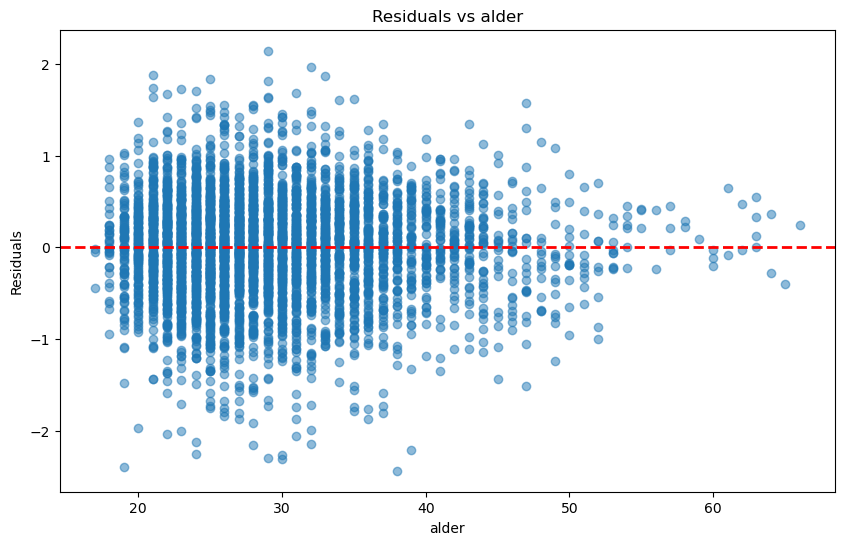

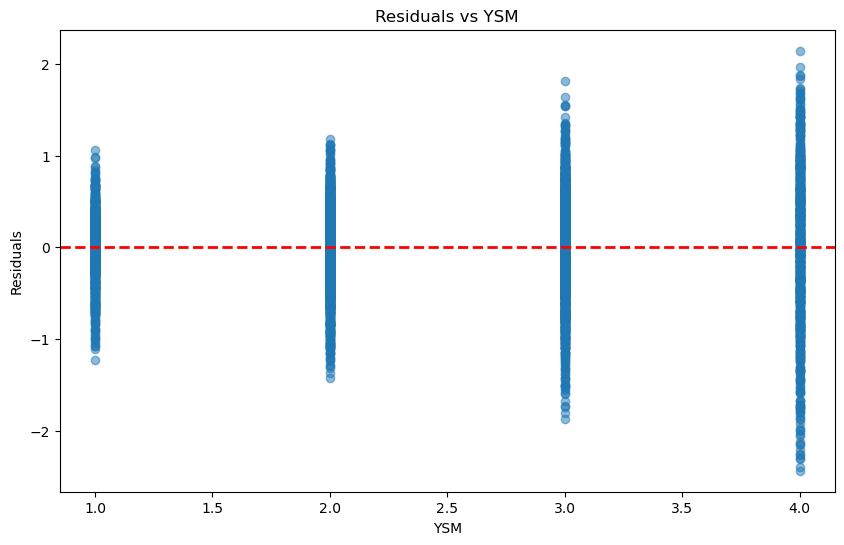

In [23]:
#3.c
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan

df['alder_squared'] = df['alder'] ** 2
df['YSM_squared'] = df['YSM'] ** 2
df['kohorte15'] = (df['ankomstaar'] == 2015).astype(int)
df['kohorte16'] = (df['ankomstaar'] == 2016).astype(int)

df_2017_2018['ln_aarslon'] = np.log(df_2017_2018['aarslon'])
X = df_2017_2018[['alder', 'alder_squared', 'YSM', 'YSM_squared', 'kohorte15', 'kohorte16']]
X = sm.add_constant(X) 
y = df_2017_2018['ln_aarslon']

model = sm.OLS(y, X).fit()
residuals = model.resid
bp_test = het_breuschpagan(residuals, X)
bp_test_statistic = bp_test[0]
bp_p_value = bp_test[1]

print(f"Breusch-Pagan Test Statistic: {bp_test_statistic}")
print(f"p-value: {bp_p_value}")

fitted_values = model.fittedvalues  

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

for var in ['alder', 'YSM']:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_2017_2018[var], residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--', lw=2)
    plt.xlabel(var)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs {var}')
    plt.show()


## Problem 5

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
#import mymlr as mlr

def simulate():

	## Step 1. Definer parameterværdier
	n = 1000
	rho = 0.5
	beta0 = 2
	beta1 = 3
	beta2 =-1

	# Step 2. Simular data
	x1 = np.random.normal(loc=25, scale=5, size=n) # Trækker x1 fra normalfordeling
	u  = np.random.uniform(low=-50, high=50, size=n) # Trækker u fra uniformfordeling
	x2_star = np.random.uniform(low=10, high=30, size=n) # Trækker x2* fra uniformfordeling
	x2 = rho*x1 + x2_star
	y = beta0 + beta1*x1 + beta2*x2 + u

	## Step 3: Estimer SLR modellen (y ~ x1)
	X = pd.DataFrame({'x1': x1}) 
	X = sm.add_constant(X)
	SLR_model = sm.OLS(y, X)
	SLR_results = SLR_model.fit()
	beta1_SLR = SLR_results.params['x1'] # Gemmer beta1 fra SLR-estimatet

	# Step 4: Estimer MLR modellen (y ~ x1 + x2)
	X = pd.DataFrame({'x1': x1, 'x2': x2})
	X = sm.add_constant(X)
	MLR_model = sm.OLS(y, X)
	MLR_results = MLR_model.fit()
	beta1_MLR = MLR_results.params['x1'] # Gemmer beta1 fra MLR-estimatet

	return beta1_SLR, beta1_MLR


def monte_carlo(reps=1000):
	np.random.seed(0) # Sæt seed så vi får samme tilfældige resultater hver gang
	SLR_results = [] # Liste til at gemme beta1 resultater fra SLR
	MLR_results = [] # Liste til at gemme beta1 resultater fra MLR

	for rep in range(reps): # Kør simulationen "reps" antal gange
		beta1_MLR, beta1_SLR = simulate()
		SLR_results.append(beta1_MLR)
		MLR_results.append(beta1_SLR)

	results = pd.DataFrame({'beta1_SLR': SLR_results, 'beta1_MLR': MLR_results})

	return results


In [4]:
results = monte_carlo()

NameError: name 'sm' is not defined